# Setup
<ul>
    <li> Choose the world environment, and define a sampler function that generates random initializations of this environment.
    <li> Set up REINFORCE and define model arguments.
    <li> Train REINFORCE on an example instance of the world you set up in step one.
</ul>

### Set up the world environment

In [1]:
from sim import SideScroller, Gobble, NoGobble
from sim import MazeArgs

In [36]:
import numpy as np
from random import randint

def sample_gobble():
    args = MazeArgs()
    args.rows = 6
    args.cols = 6
    args.targets = [[randint(0, args.rows-1), randint(0, args.cols-1)] for i in range(randint(1, 2))]
    return Gobble(args)

def sample_no_gobble():
    args = MazeArgs()
    args.rows = 6
    args.cols = 6
    args.targets = [[randint(0, args.rows-1), randint(0, args.cols-1)] for i in range(randint(1, 2))]
    return NoGobble(args)

def sample_scroller():
    args = MazeArgs()
    args.rows = 6
    args.cols = 6
    args.blockers = []
    for i in range(0, 2):
        x_loc = randint(1, args.cols - 2)
        wall_type = randint(0, 3)
        if wall_type == 0:
            args.blockers.append([x_loc, args.rows - 1])
            args.blockers.append([x_loc, args.rows - 2])
        elif wall_type == 1:
            args.blockers.append([x_loc, args.rows - 1])
        elif wall_type == 2:
            args.blockers.append([x_loc, args.rows - 2])
    return SideScroller(args)

def sample_task_named():
    which = randint(0, 2)
    if which == 1:
        return "gobbler", sample_gobble()
    elif which == 2:
        return "no gobble", sample_no_gobble()
    elif which == 0:
        return "scroller", sample_scroller()

def sample_task():
    return sample_task_named()[1]

In [38]:
# view sample environments
for i in range(0, 10):
    print("***")
    name, env = sample_task_named()
    print(name)
    env.plot()

***
no gobble
[[ 0  0  0 -1  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 1 -1  0  0  0  0]]
***
scroller
[[ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0 -1  0]
 [ 1  0 -1  0 -1  0]]
***
gobbler
[[ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 1  0 -1  0  0  0]]
***
scroller
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 0 0 0 0]]
***
gobbler
[[ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0 -1  0  0  0]
 [ 0  0  0  0  0  0]
 [ 1  0  0 -1  0  0]]
***
scroller
[[ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0 -1  0  0]
 [ 1  0  0  0  0  0]]
***
gobbler
[[ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0 -1  0  0  0]
 [ 0  0  0  0  0  0]
 [ 1  0  0  0  0  0]]
***
scroller
[[ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 

### Set up REINFORCE

In [48]:
from reinforce import REINFORCE
import utils_training

from utils import ActorSmall

In [49]:
class ModelArgs():   
    def __init__(self, world):
        # type of model related arguments
        self.seed = 1
        self.state_input_size = world.state_size
        self.action_space_size = world.num_actions
        self.lr = 3e-4
        self.ppo = True
        self.ppo_base_epsilon = 0.2
        self.ppo_dec_epsilon = 0.0
        self.use_critic = True
        self.use_entropy = False

        # training related arguments
        self.gradient_clipping = True
        self.random_perm = True
        self.num_batches = 300
        self.num_mini_batches = 1
        self.batch_size = 5
        self.horizon = 100
        self.weight_func = lambda batch_num: (1 - batch_num/self.num_batches)**2
        
        # policy
        self.policy = ActorSmall
        self.log_goal_locs = False
        self.hidden_size = 100

### Train on each of the sample worlds

/Users/kderek/maze-nav/utils.py:140: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return Categorical(self.softmax(x))


-72.0
-71.33333333333333
-49.666666666666664
-40.0
-53.333333333333336
-50.0
-2.0
-30.333333333333332
-24.0
-15.0


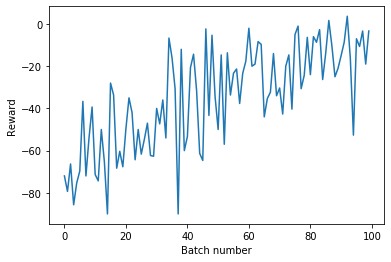

/Users/kderek/maze-nav/utils.py:140: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return Categorical(self.softmax(x))


-57.666666666666664
-69.66666666666667
-49.333333333333336
38.666666666666664
40.666666666666664
-20.666666666666668
-23.333333333333332
100.0
100.0
100.0


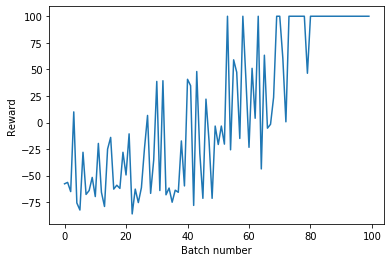

/Users/kderek/maze-nav/utils.py:140: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return Categorical(self.softmax(x))


-60.0
-68.33333333333333
-55.333333333333336
-30.333333333333332
-11.333333333333334
-24.333333333333332
-31.333333333333332
-20.666666666666668
-32.333333333333336
-7.333333333333333


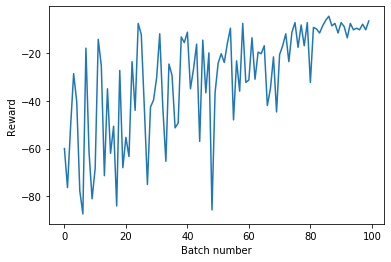

In [56]:
QUICK_RUN = False
if not QUICK_RUN:
    model_args = ModelArgs(sample_gobble())
    model_args.log_goal_locs = False
    model_args.num_batches = 100
    model_args.batch_size = 3
    model_args.num_mini_batches = 1
    model = REINFORCE(model_args)
    rewards, losses = model.train(sample_gobble().generate_fresh())
    utils_training.plot_rewards(rewards, folder=None)

    model_args = ModelArgs(sample_gobble())
    model_args.log_goal_locs = False
    model_args.num_batches = 100
    model_args.batch_size = 3
    model_args.num_mini_batches = 1
    model = REINFORCE(model_args)
    rewards, losses = model.train(sample_no_gobble().generate_fresh())
    utils_training.plot_rewards(rewards, folder=None)

    model_args = ModelArgs(sample_gobble())
    model_args.log_goal_locs = False
    model_args.num_batches = 100
    model_args.batch_size = 3
    model_args.num_mini_batches = 1
    model = REINFORCE(model_args)
    rewards, losses = model.train(sample_scroller().generate_fresh())
    utils_training.plot_rewards(rewards, folder=None)


# Compare different initializations from fast adaptation algorithms
<ul>
    <li> Batch REPTILE
    <li> Batch pretraining on samples of environment
    <li> Random initialization
</ul>

In [52]:
# with each method, we add the method's resulting parameters to PARAMS_LIST
PARAMS_LIST = []

### Batch REPTILE 

In [57]:
from utils_training import update_init_params
from tqdm.notebook import tqdm
import copy
from collections import OrderedDict

NUM_META_ITER = 500
NUM_TASKS = 5
K = 4
ALPHA = 0.1

# random initialization
model_args = ModelArgs(Gobble)
model_args.num_batches = K
model_args.batch_size = 10
model = REINFORCE(model_args)

for i in tqdm(range(NUM_META_ITER)):
    tasks = [sample_task() for _ in range(NUM_TASKS)]
    
    init_params = copy.deepcopy(OrderedDict(model.policy.named_parameters()))
    temp_params = copy.deepcopy(OrderedDict(model.policy.named_parameters()))

    for t in tasks:
        model.policy.load_state_dict(init_params)
        model.init_optimizers()

        model.train(t)
        target_policy = OrderedDict(model.policy.named_parameters())

        temp_params = update_init_params(target_policy, temp_params, ALPHA/K)
    
    model.policy.load_state_dict(temp_params)

    
result = {
        "pi": model.state_dict(),
        "label": "REPTILE"
    }
PARAMS_LIST.append(result)

/Users/kderek/maze-nav/utils.py:140: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return Categorical(self.softmax(x))


-36.6
-78.4
-71.6
-45.4
2.6
-68.2
71.6
-64.4
-65.0
-77.8
-79.4
-45.0
-97.8
-45.8
-81.4
-77.6
-15.4


KeyboardInterrupt: 

### Set up pretraining

In [58]:
model_args = ModelArgs(sample_task())
model_args.num_batches = 500
model_args.batch_size = 10
model = REINFORCE(model_args)

# we pass the model no enviornment, but just the sampler.
rewards, losses = model.train(None, sample_task)

result = {
        "pi": model.state_dict(),
        "label": "PRETRAIN"
    }
PARAMS_LIST.append(result)

2.1
-33.3


KeyboardInterrupt: 

### Random model initialization

In [ ]:
model_args = ModelArgs(Continuous2D)
model_args.num_batches = 20
model_args.batch_size = 5
model = REINFORCE(model_args)

result = {
        "pi": model.state_dict(),
        "label": "RANDOM"
    }
PARAMS_LIST.append(result)

### Compare the adaptation speed of initial parameters

In [ ]:
import utils_training

In [ ]:
NUM_GRAD_UPDATES = 4
NUM_TEST_TASKS = 5

model_args.num_batches = NUM_GRAD_UPDATES
model_args.batch_size = 1
model_args.num_mini_batches = 1
utils_training.compare_parameter_initializations(PARAMS_LIST, model_args, NUM_TEST_TASKS, sample_task)

In [ ]:
utils_training.plot_adaptation(PARAMS_LIST)